In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Kharagpur-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,17.74,1.0,1,1,2011,80.38,293.88,2.23
1,1,15.66,1.0,2,1,2011,67.69,213.31,2.02
2,2,13.92,1.0,3,1,2011,63.75,207.62,1.84
3,3,13.36,1.0,4,1,2011,69.25,260.62,2.05
4,4,14.33,1.0,5,1,2011,59.81,275.44,1.91
...,...,...,...,...,...,...,...,...,...
3738,3738,30.34,1.0,27,3,2021,48.69,230.88,0.85
3739,3739,30.01,1.0,28,3,2021,51.06,211.94,1.26
3740,3740,30.68,1.0,29,3,2021,55.00,213.94,1.88
3741,3741,32.24,1.0,30,3,2021,47.19,225.88,1.82


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.26469328])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.264693
dtype: float64

<AxesSubplot:>

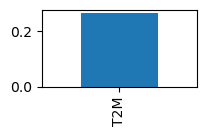

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 1762, 1.0: 1232})
The number of classes after fit Counter({1.0: 1762, 0.0: 1762})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[399  42]
 [ 59 249]]
0.8651535380507344
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       441
         1.0       0.86      0.81      0.83       308

    accuracy                           0.87       749
   macro avg       0.86      0.86      0.86       749
weighted avg       0.86      0.87      0.86       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8566017316017316

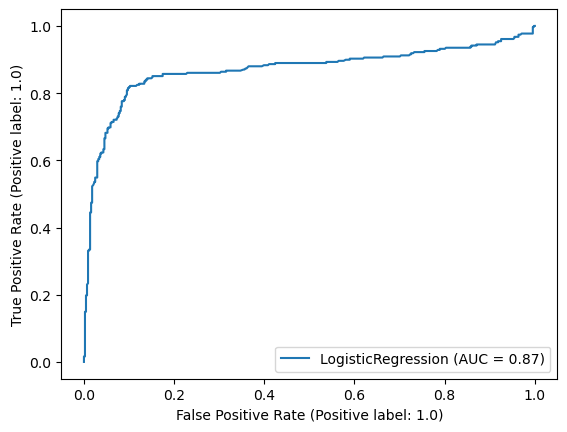

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[404  37]
 [ 74 234]]
0.8518024032042724
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       441
         1.0       0.86      0.76      0.81       308

    accuracy                           0.85       749
   macro avg       0.85      0.84      0.84       749
weighted avg       0.85      0.85      0.85       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8379200164914451

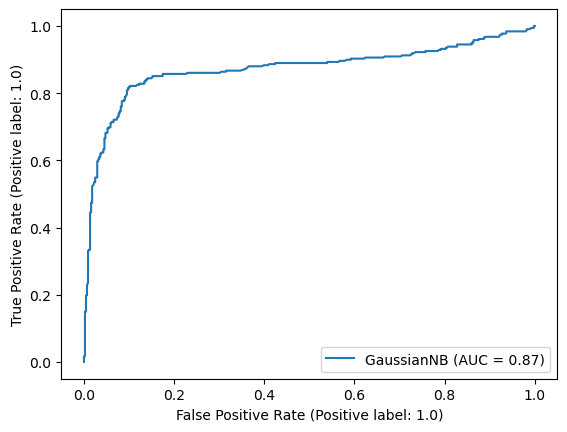

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[367  74]
 [ 69 239]]
0.8090787716955942
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       441
         1.0       0.76      0.78      0.77       308

    accuracy                           0.81       749
   macro avg       0.80      0.80      0.80       749
weighted avg       0.81      0.81      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8040867862296434

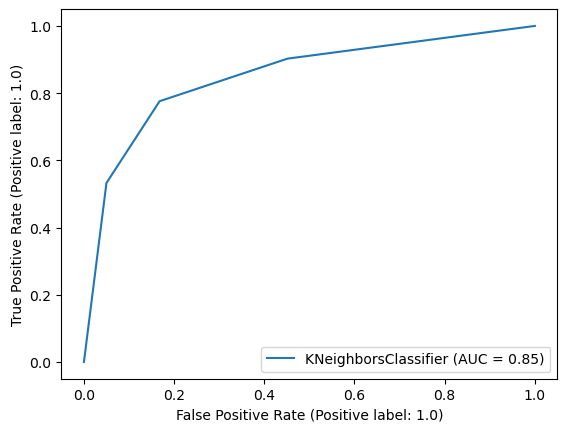

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[396  45]
 [ 57 251]]
0.8638184245660881
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       441
         1.0       0.85      0.81      0.83       308

    accuracy                           0.86       749
   macro avg       0.86      0.86      0.86       749
weighted avg       0.86      0.86      0.86       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8564471243042673

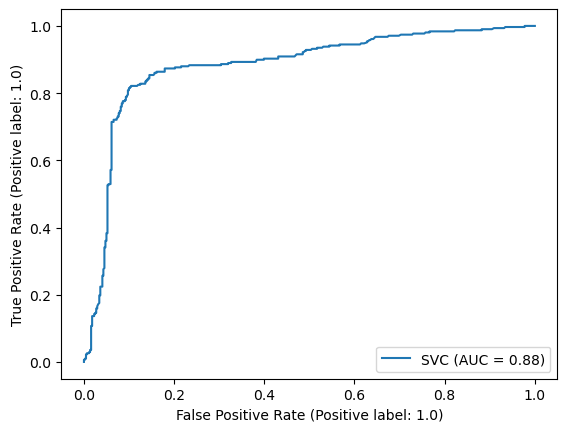

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[399  42]
 [ 62 246]]
0.8611481975967957
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       441
         1.0       0.85      0.80      0.83       308

    accuracy                           0.86       749
   macro avg       0.86      0.85      0.86       749
weighted avg       0.86      0.86      0.86       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[373  68]
 [ 80 228]]
0.8024032042723631
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       441
         1.0       0.77      0.74      0.75       308

    accuracy                           0.80       749
   macro avg       0.80      0.79      0.79       749
weighted avg       0.80      0.80      0.80       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7930323644609358

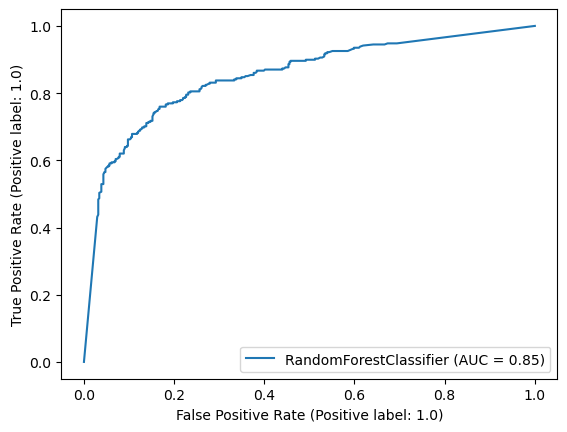

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.009343
0:	total: 48.4ms	remaining: 1m 36s
1:	total: 49.8ms	remaining: 49.8s
2:	total: 50.7ms	remaining: 33.8s
3:	total: 51.6ms	remaining: 25.8s
4:	total: 52.6ms	remaining: 21s
5:	total: 54.7ms	remaining: 18.2s
6:	total: 58.8ms	remaining: 16.7s
7:	total: 60.9ms	remaining: 15.2s
8:	total: 62.9ms	remaining: 13.9s
9:	total: 64.8ms	remaining: 12.9s
10:	total: 66.8ms	remaining: 12.1s
11:	total: 68.6ms	remaining: 11.4s
12:	total: 70.5ms	remaining: 10.8s
13:	total: 72.4ms	remaining: 10.3s
14:	total: 74.3ms	remaining: 9.83s
15:	total: 76.2ms	remaining: 9.45s
16:	total: 77.9ms	remaining: 9.09s
17:	total: 79.8ms	remaining: 8.78s
18:	total: 81.5ms	remaining: 8.49s
19:	total: 83.5ms	remaining: 8.27s
20:	total: 85.4ms	remaining: 8.04s
21:	total: 86.9ms	remaining: 7.81s
22:	total: 88.6ms	remaining: 7.62s
23:	total: 90.5ms	remaining: 7.45s
24:	total: 92.4ms	remaining: 7.3s
25:	total: 94.3ms	remaining: 7.16s
26:	total: 96.1ms	remaining: 7.02s
27:	total: 98ms	remaining: 6.9s
28:	t

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[386  55]
 [ 54 254]]
0.8544726301735648
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       441
         1.0       0.82      0.82      0.82       308

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8499793856936715

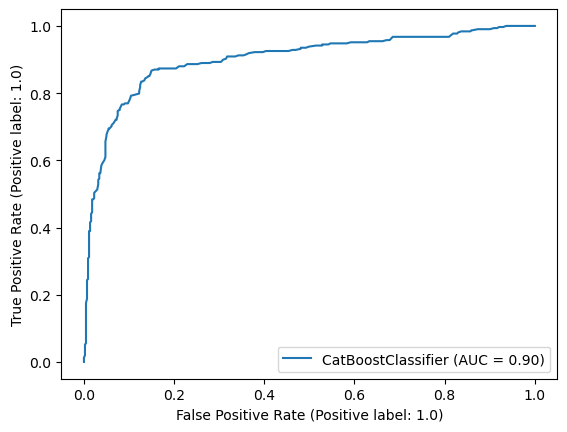

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']